# Exploratory Data Analysis (EDA) and Statistical Analysis

---



# Loading the files

In [ ]:
from fiona.drvsupport import supported_drivers
import geopandas as gpd
import fiona
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
# Read the file
fp = "NYC Area2010_2data.shp"
data = gpd.read_file(fp)

# Basic Data Exploration

In [ ]:
data.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
data['geometry'].head()

0    POLYGON ((1841847.969 592630.580, 1841844.383 ...
1    POLYGON ((1837243.410 591078.541, 1837243.165 ...
2    POLYGON ((1831763.078 592912.026, 1831671.368 ...
3    POLYGON ((1831799.005 592819.149, 1831826.938 ...
4    POLYGON ((1831900.996 592721.904, 1831900.789 ...
Name: geometry, dtype: geometry

In [ ]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [ ]:
print(data.head(2))

  STATEFP10  COUNTYFP10 TRACTCE10 BLOCKCE10          GEOID10      NAME10  \
0        36           5    051600      5011  360050516005011  Block 5011   
1        36           5    030000      4003  360050300004003  Block 4003   

  MTFCC10 UR10 UACE10 UATYP10  ... CE03_12  C000_13  CE01_13 CE02_13 CE03_13  \
0   G5040    U  63217       U  ...       0        0        0       0       0   
1   G5040    U  63217       U  ...      46       93       18      26      49   

  C000_14  CE01_14  CE02_14  CE03_14  \
0       0        0        0        0   
1     111       22       38       51   

                                            geometry  
0  POLYGON ((1841847.969 592630.580, 1841844.383 ...  
1  POLYGON ((1837243.410 591078.541, 1837243.165 ...  

[2 rows x 71 columns]


In [ ]:
print(data.columns)
data.to_csv('my_data.csv', index=False)

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10', 'GEOID10',
       'NAME10', 'MTFCC10', 'UR10', 'UACE10', 'UATYP10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'GISJOIN',
       'Shape_area', 'Shape_len', 'C000_02', 'CE01_02', 'CE02_02', 'CE03_02',
       'C000_03', 'CE01_03', 'CE02_03', 'CE03_03', 'C000_04', 'CE01_04',
       'CE02_04', 'CE03_04', 'C000_05', 'CE01_05', 'CE02_05', 'CE03_05',
       'C000_06', 'CE01_06', 'CE02_06', 'CE03_06', 'C000_07', 'CE01_07',
       'CE02_07', 'CE03_07', 'C000_08', 'CE01_08', 'CE02_08', 'CE03_08',
       'C000_09', 'CE01_09', 'CE02_09', 'CE03_09', 'C000_10', 'CE01_10',
       'CE02_10', 'CE03_10', 'C000_11', 'CE01_11', 'CE02_11', 'CE03_11',
       'C000_12', 'CE01_12', 'CE02_12', 'CE03_12', 'C000_13', 'CE01_13',
       'CE02_13', 'CE03_13', 'C000_14', 'CE01_14', 'CE02_14', 'CE03_14',
       'geometry'],
      dtype='object')


In [ ]:
print(data.dtypes)

STATEFP10       object
COUNTYFP10       int64
TRACTCE10       object
BLOCKCE10       object
GEOID10         object
                ...   
C000_14          int64
CE01_14          int64
CE02_14          int64
CE03_14          int64
geometry      geometry
Length: 71, dtype: object


# Null value analysis

Since we did not find much relation between these columns and our target variable in predictive analysis we have not dealt with the cleaning part of the data for them.

In [ ]:
if data.isnull().any(axis=0).any():
    # Print the names of the columns that have missing values
    cols_with_missing = data.columns[data.isnull().any(axis=0)]
    print("Columns with missing values:", cols_with_missing)
else:
    print("No columns have missing values.")

Columns with missing values: Index(['UACE10', 'UATYP10'], dtype='object')


In [ ]:
data['UACE10'].isnull().sum()

4701

In [ ]:
data['UATYP10'].isnull().sum()

4701

# Statistical Analysis of selected columns of importance

In [ ]:
selected_cols = ['ALAND10', 'AWATER10', 'Shape_area', 'Shape_len', 'C000_02', 'CE01_02', 'CE02_02', 'CE03_02',
                 'C000_03', 'CE01_03', 'CE02_03', 'CE03_03', 'C000_04', 'CE01_04',
                 'CE02_04', 'CE03_04', 'C000_05', 'CE01_05', 'CE02_05', 'CE03_05',
                 'C000_06', 'CE01_06', 'CE02_06', 'CE03_06', 'C000_07', 'CE01_07',
                 'CE02_07', 'CE03_07', 'C000_08', 'CE01_08', 'CE02_08', 'CE03_08',
                 'C000_09', 'CE01_09', 'CE02_09', 'CE03_09', 'C000_10', 'CE01_10',
                 'CE02_10', 'CE03_10', 'C000_11', 'CE01_11', 'CE02_11', 'CE03_11',
                 'C000_12', 'CE01_12', 'CE02_12', 'CE03_12', 'C000_13', 'CE01_13',
                 'CE02_13', 'CE03_13', 'C000_14', 'CE01_14', 'CE02_14', 'CE03_14']

print(data[selected_cols].describe())

            ALAND10      AWATER10    Shape_area      Shape_len        C000_02  \
count  1.084870e+05  1.084870e+05  1.084870e+05  108487.000000  108487.000000   
mean   5.019323e+04  1.606373e+03  5.115115e+04     845.146298      42.868344   
std    2.256890e+05  1.041099e+05  2.282010e+05    1035.349613      74.436513   
min    0.000000e+00  0.000000e+00  2.080869e+00       8.062961       0.000000   
25%    9.896000e+03  0.000000e+00  1.008985e+04     444.711978       3.000000   
50%    1.628700e+04  0.000000e+00  1.642545e+04     592.780342      21.000000   
75%    2.767250e+04  0.000000e+00  2.819973e+04     835.098159      48.000000   
max    1.648687e+07  3.026354e+07  1.648688e+07   45439.126182    1961.000000   

             CE01_02        CE02_02        CE03_02        C000_03  \
count  108487.000000  108487.000000  108487.000000  108487.000000   
mean       11.844120      15.891111      15.133113      42.426899   
std        21.661043      29.483090      30.494633      73.6818

# All animated graphs can be found at this github link - https://github.com/bhavna2905/Adv-Analytics

# Due to limited resources, we decided against slowing them down in the code blocks (longer load time) and instead have saved them as 8-10 second .mp4 files.

# Data Visualisation (Countywise Yearly Jobs)

 

*   County '47', '81', and '103' outperformed the other counties in terms of total,low, and median pay jobs.
*   However, county '61' turned out to be the one with the most high paying jobs.

*   Followed by a close and fluctuation competition between '47', '81', and '103'.

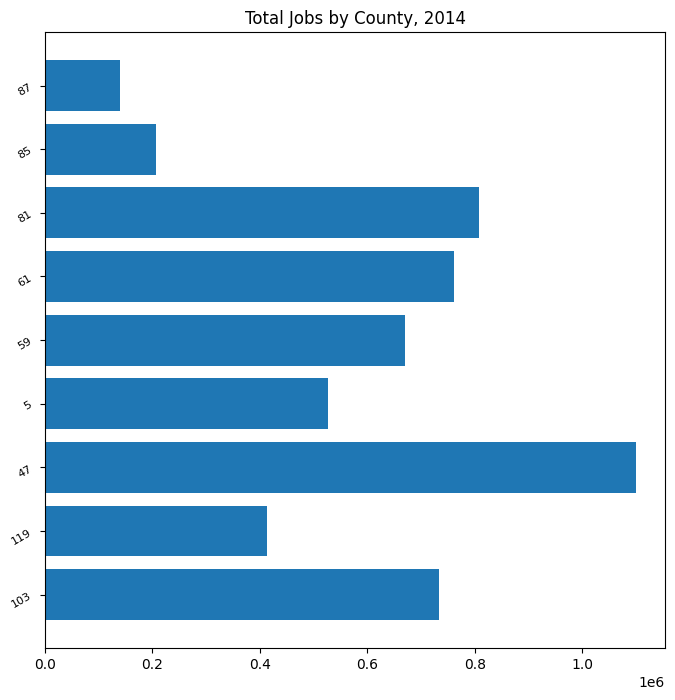

In [ ]:
# Define a function to update the bar chart for each frame of the animation
def animate(i):
    year = 2002 + i # Start from year 2002
    df = data[data["C000_" + str(year)[-2:]] > 0] # Filter out rows with zero jobs
    state_totals = data.groupby(df["COUNTYFP10"].astype(str))["C000_" + str(year)[-2:]].sum() # Convert COUNTYFP10 to string
    ax.clear()
    ax.barh(state_totals.index, state_totals.values) 
    ax.set_yticks(state_totals.index) 
    ax.set_yticklabels(state_totals.index, rotation=30, fontsize=8) 
    ax.tick_params(axis="y", pad=5) 
    ax.set_title("Total Jobs by County, " + str(year))

# Create a figure and axis for the animation
fig, ax = plt.subplots()
fig.set_size_inches(8, 8) 

# Create the animated bar chart with 13 frames (2002-2014)
animation = FuncAnimation(fig, animate, frames=13, interval=500)

# Save the animation to a file
animation.save('Total_Jobs_by_County.mp4')

# Show the animation
plt.show()

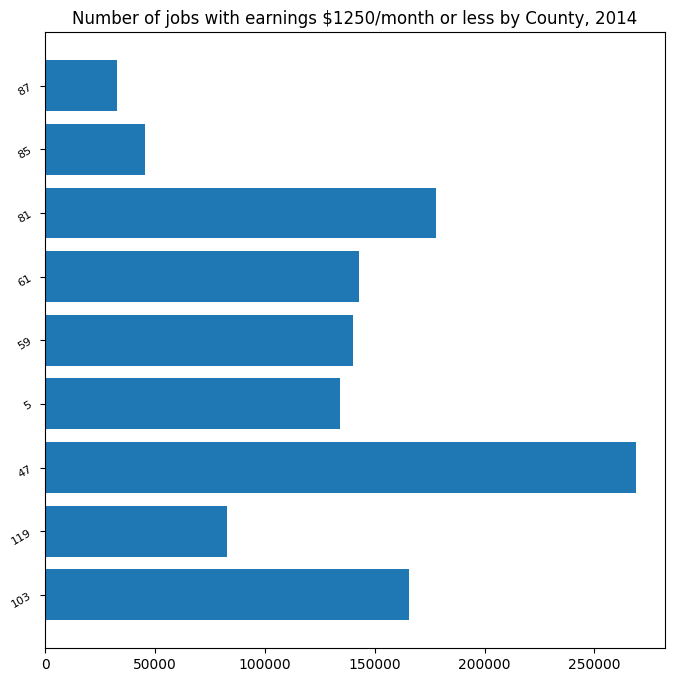

In [ ]:
# Define a function to update the bar chart for each frame of the animation
def animate(i):
    year = 2002 + i # Start from year 2002
    df = data[data["CE01_" + str(year)[-2:]] > 0] # Filter out rows with zero jobs
    state_totals = data.groupby(df["COUNTYFP10"].astype(str))["CE01_" + str(year)[-2:]].sum() # Convert COUNTYFP10 to string
    ax.clear()
    ax.barh(state_totals.index, state_totals.values) 
    ax.set_yticks(state_totals.index) 
    ax.set_yticklabels(state_totals.index, rotation=30, fontsize=8) 
    ax.tick_params(axis="y", pad=5) 
    ax.set_title("Number of jobs with earnings $1250/month or less by County, " + str(year))

# Create a figure and axis for the animation
fig, ax = plt.subplots()
fig.set_size_inches(8, 8) 

# Create the animated bar chart with 13 frames (2002-2014)
animation = FuncAnimation(fig, animate, frames=13, interval=500)

# Save the animation to a file
animation.save('Number_of_jobs_with_earnings_$1250_per_month_or_less_by_County.mp4')

# Show the animation
plt.show()

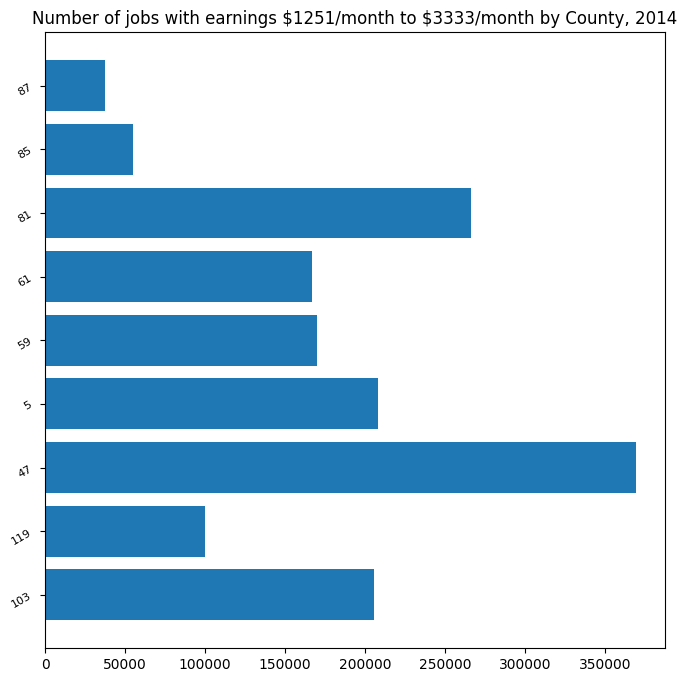

In [30]:
# Define a function to update the bar chart for each frame of the animation
def animate(i):
    year = 2002 + i # Start from year 2002
    df = data[data["CE02_" + str(year)[-2:]] > 0] # Filter out rows with zero jobs
    state_totals = data.groupby(df["COUNTYFP10"].astype(str))["CE02_" + str(year)[-2:]].sum() # Convert COUNTYFP10 to string
    ax.clear()
    ax.barh(state_totals.index, state_totals.values) 
    ax.set_yticks(state_totals.index) 
    ax.set_yticklabels(state_totals.index, rotation=30, fontsize=8) 
    ax.tick_params(axis="y", pad=5) 
    ax.set_title("Number of jobs with earnings \$1251/month to \$3333/month by County, " + str(year))

# Create a figure and axis for the animation
fig, ax = plt.subplots()
fig.set_size_inches(8, 8) 

# Create the animated bar chart with 21 frames (2002-2022)
animation = FuncAnimation(fig, animate, frames=13, interval=500)

# Save the animation to a file
animation.save('Number_of_jobs_with_earnings_$1251_per_month_to_$3333_per_month_by_County.mp4')

# Show the animation
plt.show()

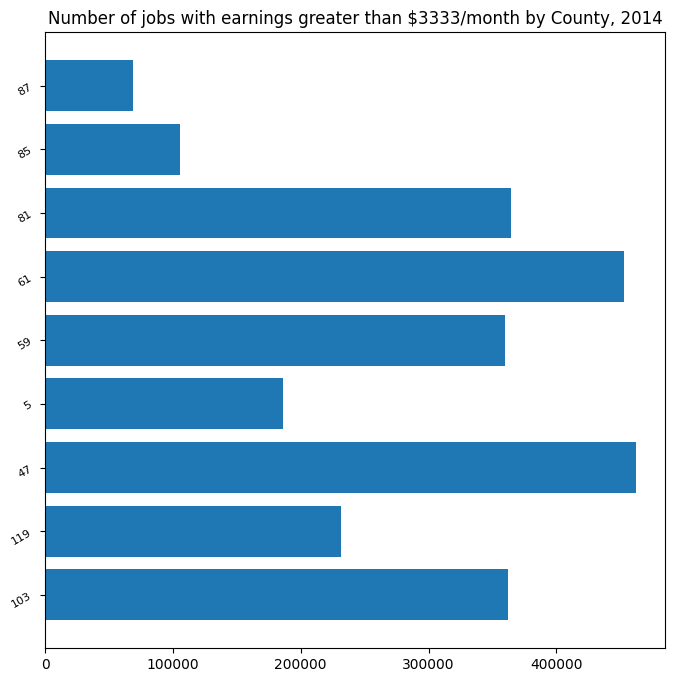

In [ ]:
# Define a function to update the bar chart for each frame of the animation
def animate(i):
    year = 2002 + i # Start from year 2002
    df = data[data["CE03_" + str(year)[-2:]] > 0] # Filter out rows with zero jobs
    state_totals = data.groupby(df["COUNTYFP10"].astype(str))["CE03_" + str(year)[-2:]].sum() # Convert COUNTYFP10 to string
    ax.clear()
    ax.barh(state_totals.index, state_totals.values) 
    ax.set_yticks(state_totals.index) 
    ax.set_yticklabels(state_totals.index, rotation=30, fontsize=8) 
    ax.tick_params(axis="y", pad=5) 
    ax.set_title("Number of jobs with earnings greater than $3333/month by County, " + str(year))

# Create a figure and axis for the animation
fig, ax = plt.subplots()
fig.set_size_inches(8, 8) 

# Create the animated bar chart with 21 frames (2002-2022)
animation = FuncAnimation(fig, animate, frames=13, interval=500)

# Save the animation to a file
animation.save('Number_of_jobs_with_earnings_greater_than_$3333_per_month_by_County.mp4')

# Show the animation
plt.show()

# Data Visualisation (Year wise Urban-Rural Job Share)

*   We noticed a similar trend as is for total jobs for all salary brackets.
*   And as we expected, Urban type areas have monopoly on jobs throughout.

*   Rural type areas occupy less than 1% of the job share in all categories.





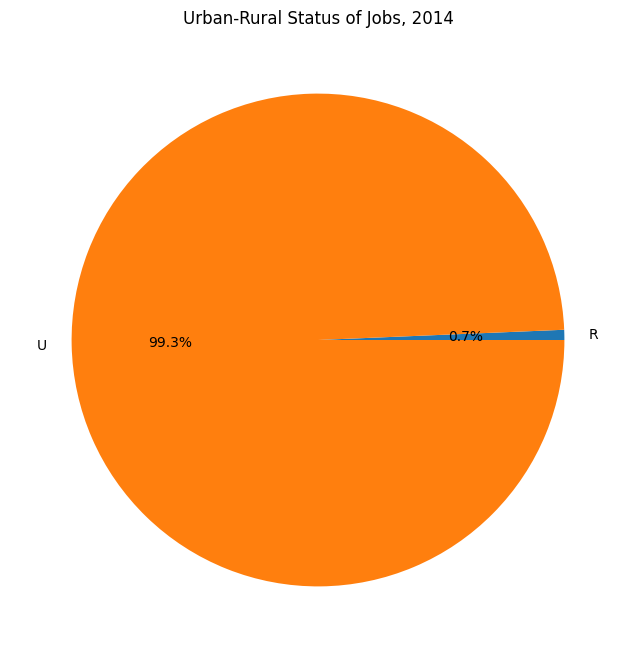

In [ ]:
def animate(i):
    year = 2002 + i # Start from year 2002
    df = data[data["C000_" + str(year)[-2:]] > 0] # Filter out rows with zero jobs
    ur_totals = df.groupby("UR10")["C000_" + str(year)[-2:]].sum()
    ax.clear()
    ax.pie(ur_totals.values, labels=ur_totals.index, autopct='%1.1f%%') # Create the pie chart
    ax.set_title("Urban-Rural Status of Jobs, " + str(year))

# Create a figure and axis for the animation
fig, ax = plt.subplots()
fig.set_size_inches(8, 8) 

# Create the animated pie chart with 13 frames (2002-2014)
animation = FuncAnimation(fig, animate, frames=13, interval=500)

# Save the animation to a file
animation.save('Urban-Rural Status of Jobs.mp4')

# Show the animation
plt.show()

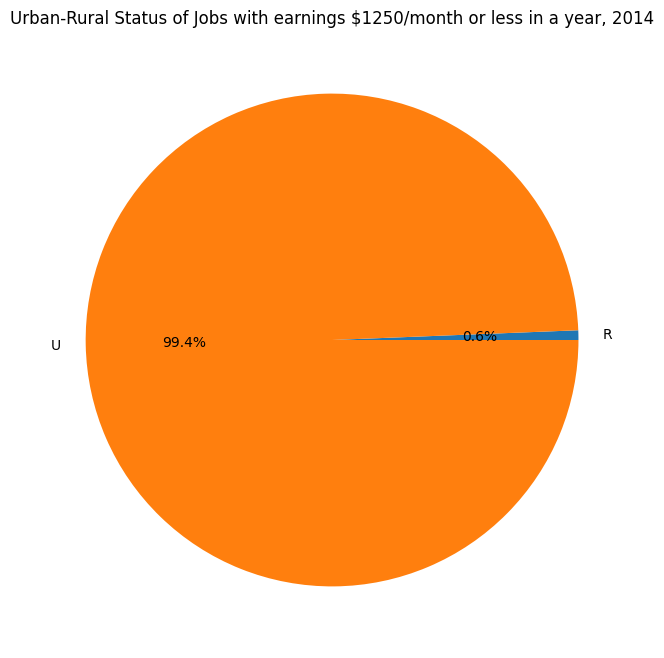

In [ ]:
def animate(i):
    year = 2002 + i # Start from year 2002
    df = data[data["CE01_" + str(year)[-2:]] > 0] # Filter out rows with zero jobs
    ur_totals = df.groupby("UR10")["CE01_" + str(year)[-2:]].sum()
    ax.clear()
    ax.pie(ur_totals.values, labels=ur_totals.index, autopct='%1.1f%%') # Create the pie chart
    ax.set_title("Urban-Rural Status of Jobs with earnings $1250/month or less in a year, " + str(year))

# Create a figure and axis for the animation
fig, ax = plt.subplots()
fig.set_size_inches(8, 8) 

# Create the animated pie chart with 13 frames (2002-2014)
animation = FuncAnimation(fig, animate, frames=13, interval=500)

# Save the animation to a file
animation.save('Urban-Rural Status of Jobs with earnings $1250 per month or less in a year.mp4')

# Show the animation
plt.show()

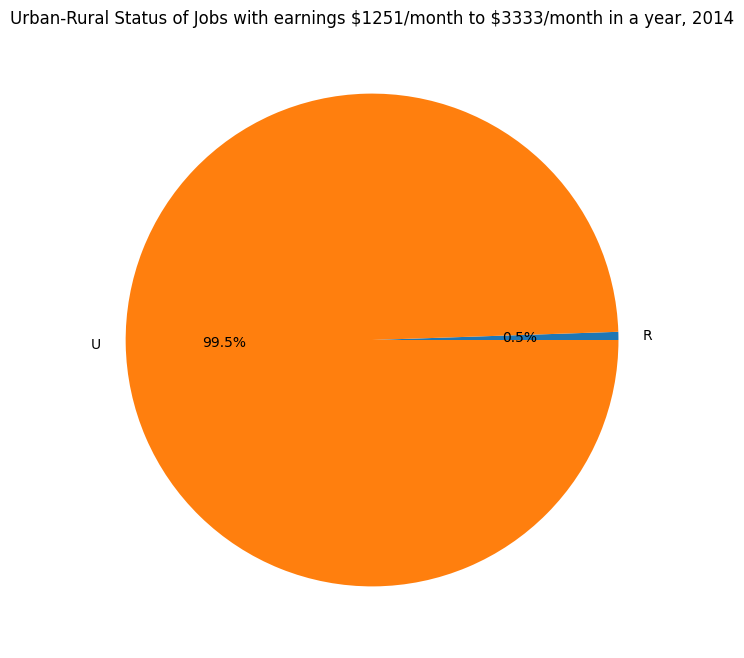

In [31]:
def animate(i):
    year = 2002 + i # Start from year 2002
    df = data[data["CE02_" + str(year)[-2:]] > 0] # Filter out rows with zero jobs
    ur_totals = df.groupby("UR10")["CE02_" + str(year)[-2:]].sum()
    ax.clear()
    ax.pie(ur_totals.values, labels=ur_totals.index, autopct='%1.1f%%') # Create the pie chart
    ax.set_title("Urban-Rural Status of Jobs with earnings \$1251/month to \$3333/month in a year, " + str(year))

# Create a figure and axis for the animation
fig, ax = plt.subplots()
fig.set_size_inches(8, 8) 

# Create the animated pie chart with 13 frames (2002-2014)
animation = FuncAnimation(fig, animate, frames=13, interval=500)

# Save the animation to a file
animation.save('Urban-Rural Status of Jobs with earnings $1251 per month to $3333 per month in a year.mp4')

# Show the animation
plt.show()

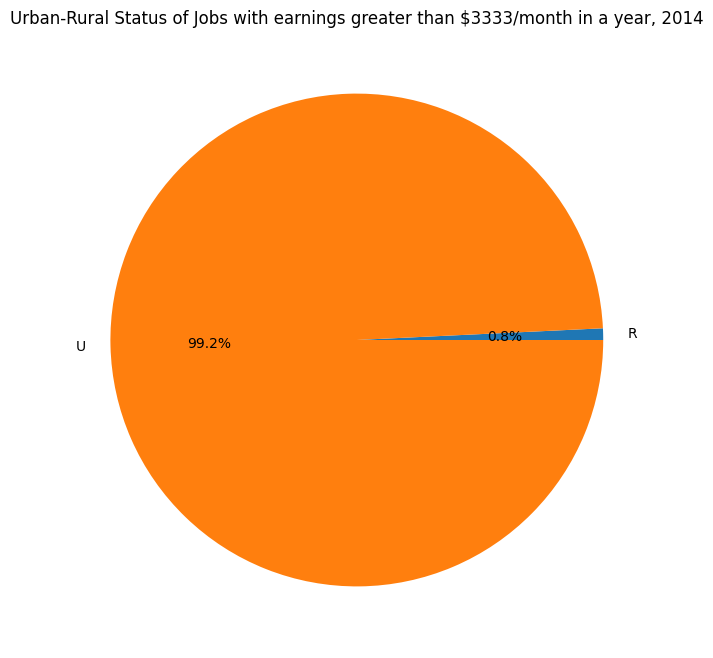

In [ ]:
def animate(i):
    year = 2002 + i # Start from year 2002
    df = data[data["CE03_" + str(year)[-2:]] > 0] # Filter out rows with zero jobs
    ur_totals = df.groupby("UR10")["CE03_" + str(year)[-2:]].sum()
    ax.clear()
    ax.pie(ur_totals.values, labels=ur_totals.index, autopct='%1.1f%%') # Create the pie chart
    ax.set_title("Urban-Rural Status of Jobs with earnings greater than $3333/month in a year, " + str(year))

# Create a figure and axis for the animation
fig, ax = plt.subplots()
fig.set_size_inches(8, 8) 

# Create the animated pie chart with 13 frames (2002-2014)
animation = FuncAnimation(fig, animate, frames=13, interval=500)

# Save the animation to a file
animation.save('Urban-Rural Status of Jobs with earnings greater than $3333 per month in a year.mp4')

# Show the animation
plt.show()

# Data Visualisation (Year wise Total Jobs)

We observe the maximum change in total jobs as just in themselves. Total jobs by year have increased linearly through 2004-2014. 

The trend for job with salary brackets between \$1250/month or less and \$1251/month to $3333/month have been similar. They experienced a linear fall up until 2009 and since then have started an upward trend.

However, jobs with earnings greater than $3333/month have had a constant increase.

This leads us to the following conclusion - 



*   Jobs have been on a rise.
*   Avg salary brackets have increased.


*   However, since 2009 we have noticed a rise in jobs with salaries less than $3333/month which can mean that there might be new trend soon.





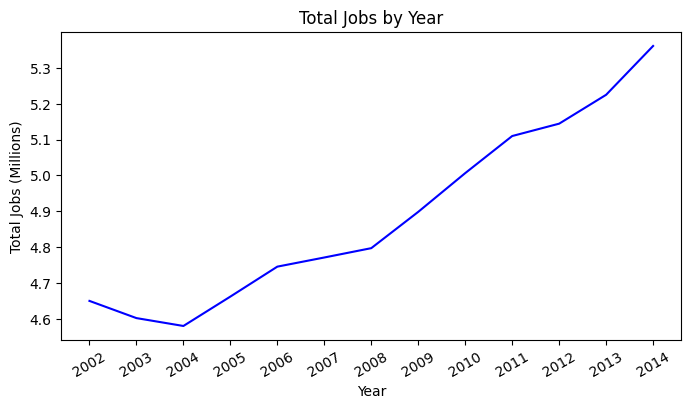

In [ ]:
# Create a new DataFrame with the C000_YR columns
totals = pd.DataFrame({'C000_YR': []})
for year in range(2002, 2015):
    col = f'C000_{str(year)[-2:]}'
    totals.loc[year] = data[col].sum()/ 1e6

# Create a line graph of total jobs by year
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
ax.plot(totals.index, totals['C000_YR'], color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Total Jobs (Millions)')
ax.set_title('Total Jobs by Year')

# Set the x-ticks to be all years and rotate the labels
ax.set_xticks(range(2002, 2015))
ax.tick_params(axis='x', rotation=30)

plt.show()

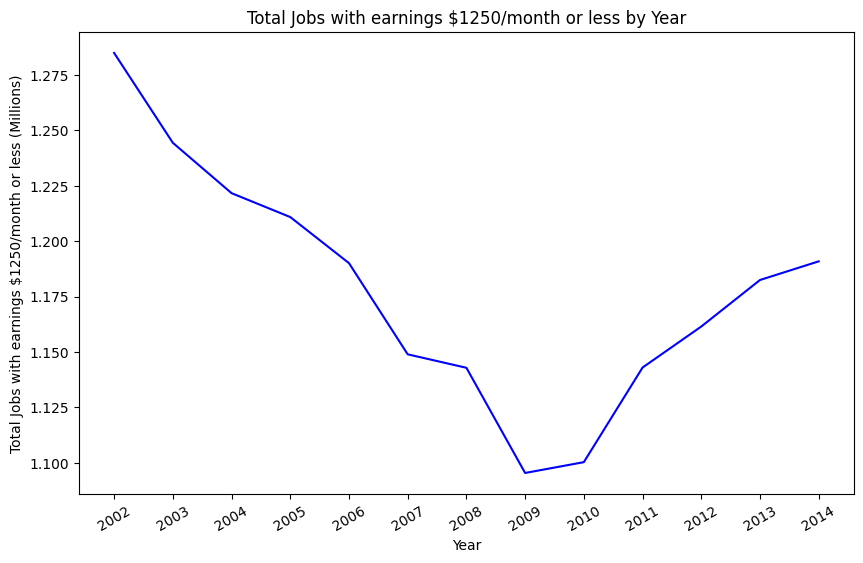

In [ ]:
# Create a new DataFrame with the C000_YR columns
totals = pd.DataFrame({'CE01_YR': []})
for year in range(2002, 2015):
    col = f'CE01_{str(year)[-2:]}'
    totals.loc[year] = data[col].sum()/ 1e6

# Create a line graph of total jobs by year
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(totals.index, totals['CE01_YR'], color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Total Jobs with earnings $1250/month or less (Millions)')
ax.set_title('Total Jobs with earnings $1250/month or less by Year')

# Set the x-ticks to be all years and rotate the labels
ax.set_xticks(range(2002, 2015))
ax.tick_params(axis='x', rotation=30)

plt.show()

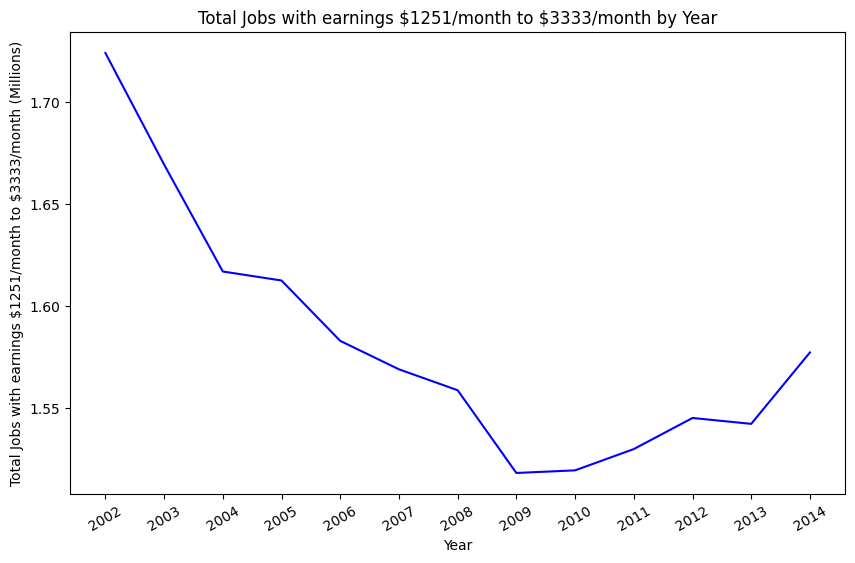

In [32]:
# Create a new DataFrame with the C000_YR columns
totals = pd.DataFrame({'CE02_YR': []})
for year in range(2002, 2015):
    col = f'CE02_{str(year)[-2:]}'
    totals.loc[year] = data[col].sum()/ 1e6

# Create a line graph of total jobs by year
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(totals.index, totals['CE02_YR'], color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Total Jobs with earnings \$1251/month to \$3333/month (Millions)')
ax.set_title('Total Jobs with earnings \$1251/month to \$3333/month by Year')

# Set the x-ticks to be all years and rotate the labels
ax.set_xticks(range(2002, 2015))
ax.tick_params(axis='x', rotation=30)

plt.show()

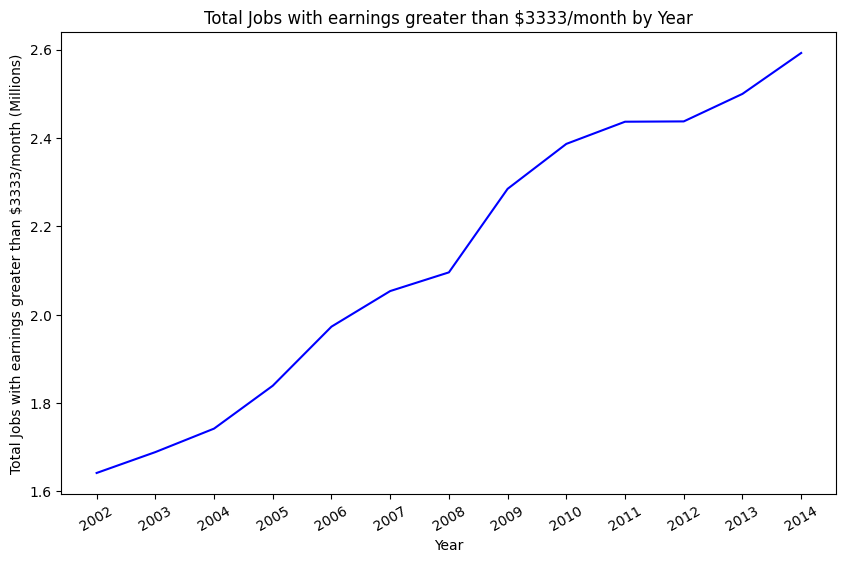

In [ ]:
# Create a new DataFrame with the C000_YR columns
totals = pd.DataFrame({'CE03_YR': []})
for year in range(2002, 2015):
    col = f'CE03_{str(year)[-2:]}'
    totals.loc[year] = data[col].sum()/ 1e6

# Create a line graph of total jobs by year
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(totals.index, totals['CE03_YR'], color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Total Jobs with earnings greater than $3333/month (Millions)')
ax.set_title('Total Jobs with earnings greater than $3333/month by Year')

# Set the x-ticks to be all years and rotate the labels
ax.set_xticks(range(2002, 2015))
ax.tick_params(axis='x', rotation=30)

plt.show()



---


# Conclusion




Exploratory Data Analysis (EDA) and Statistical Analysis are important techniques used in data science to gain insights and make informed decisions.

EDA is used to examine the structure and content of a dataset to identify patterns, relationships, and anomalies. It helps to understand the underlying trends in the data and to identify areas that need further investigation.

Statistical analysis involves using statistical methods to analyze and interpret data. It helps to summarize and describe data, test hypotheses, and make predictions based on the data. 

As we discussed at the beginning of every section, we have made various observations that give us information of what kind of data and what relations in said data are we dealing with. We can draw rough conclusions using EDA already but to give us observations a numerical backing we should conduct further modeling techniques.

Using the insights we have gained in this section, we will now conduct further in depth analysis using Spatial visualisation and Predictive modeling techniques.



---
End of EDA and Statistical Analysis 


---


